In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

df = pd.read_csv('coded.csv')

In [3]:
relevant_questions = [
    #'On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you\'re not in an aisle seat?',
    #'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?',
    #'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?',
    #'Is it rude to ask someone to switch seats with you in order to be closer to friends?',
    #'Is itrude to ask someone to switch seats with you in order to be closer to family?',
    #'Is it rude to wake a passenger up if you are trying to go to the bathroom?',
    #'Is itrude to wake a passenger up if you are trying to walk around?',
    #'In general, is itrude to bring a baby on a plane?',
    #'In general, is it rude to knowingly bring unruly children on a plane?',
    #'Is itrude to move to an unsold seat on a plane?',
    #'Is itrude to recline your seat on a plane?',
    "Do you ever recline your seat when you fly?"
    ]

scaler = MinMaxScaler()
df[relevant_questions] = scaler.fit_transform(df[relevant_questions])
df['Score'] = df[relevant_questions].sum(axis=1)

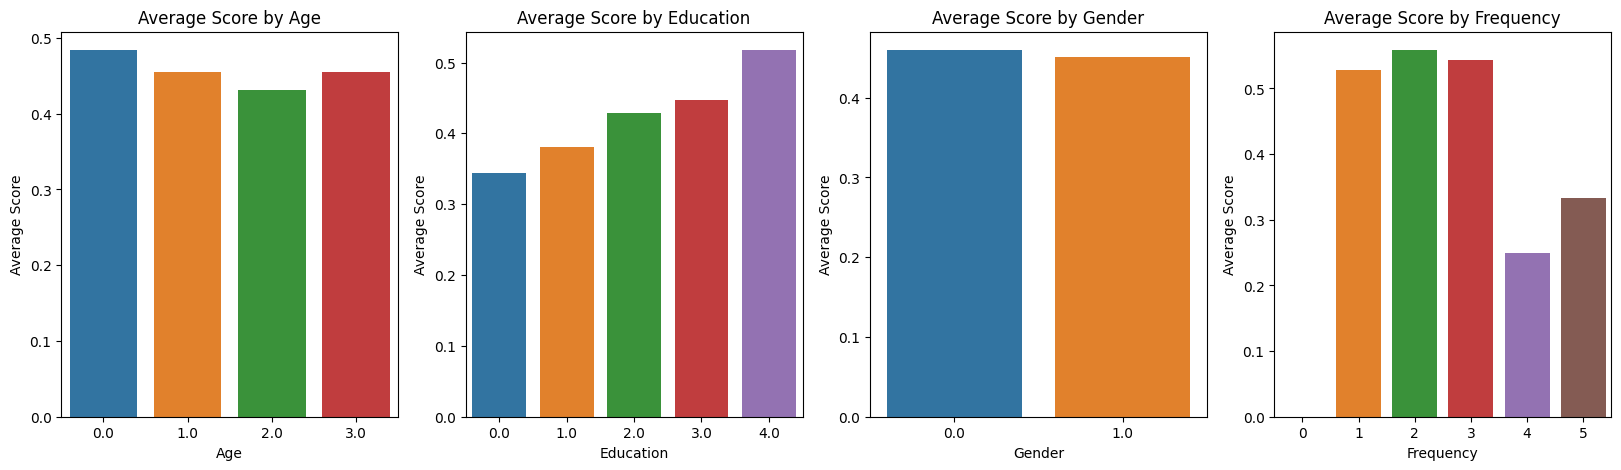

<Figure size 2000x500 with 0 Axes>

In [7]:
# Calculate the mean scores for each category
age_means = df.groupby('Age')['Score'].mean()
education_means = df.groupby('Education')['Score'].mean()
gender_means = df.groupby('Gender')['Score'].mean()
frequency_means = df.groupby('How often do you travel by plane?')['Score'].mean()

# Set up the matplotlib figure
plt.figure(figsize=(20, 5))

# Age
plt.subplot(1, 4, 1)  # 1 row, 3 columns, 1st subplot
sns.barplot(x=age_means.index, y=age_means.values)
plt.title('Average Score by Age')
plt.ylabel('Average Score')
plt.xlabel('Age')

# Education
plt.subplot(1, 4, 2)  # 1 row, 3 columns, 2nd subplot
sns.barplot(x=education_means.index, y=education_means.values)
plt.title('Average Score by Education')
plt.ylabel('Average Score')
plt.xlabel('Education')

# Gender
plt.subplot(1, 4, 3)  # 1 row, 3 columns, 3rd subplot
sns.barplot(x=gender_means.index, y=gender_means.values)
plt.title('Average Score by Gender')
plt.ylabel('Average Score')
plt.xlabel('Gender')

plt.subplot(1, 4, 4)  # 1 row, 3 columns, 3rd subplot
sns.barplot(x=frequency_means.index, y=frequency_means.values)
plt.title('Average Score by Frequency')
plt.ylabel('Average Score')
plt.xlabel('Frequency')

# Frequency
plt.figure(figsize=(20, 5))

# Display the plots
plt.tight_layout()
plt.show()